**- Importing Libaries**

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import ast
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # for class balancing
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from xgboost import XGBRegressor



In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [5]:
from catboost import CatBoostRegressor, CatBoostClassifier

**- Importing Dataset**

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/movies_metadata.csv')

**- Analysing the Data Structure**

In [11]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [13]:
df.describe()


,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [14]:
df.shape

(45466, 24)

**- Checking and removing the null values and unwanted columns**

In [15]:
df.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


In [16]:
# To drop unwanted columns
df = df.drop(['imdb_id','tagline','spoken_languages','poster_path','overview','id','belongs_to_collection','homepage','video','title','adult','status'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   original_language     45455 non-null  object 
 3   original_title        45466 non-null  object 
 4   popularity            45461 non-null  object 
 5   production_companies  45463 non-null  object 
 6   production_countries  45463 non-null  object 
 7   release_date          45379 non-null  object 
 8   revenue               45460 non-null  float64
 9   runtime               45203 non-null  float64
 10  vote_average          45460 non-null  float64
 11  vote_count            45460 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.2+ MB


In [18]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,5.7,173.0


In [19]:
df.isna().sum()

,0
budget,0
genres,0
original_language,11
original_title,0
popularity,5
production_companies,3
production_countries,3
release_date,87
revenue,6
runtime,263


In [20]:
df['budget'].unique()

array(['30000000', '65000000', '0', ..., '3417000', '25868826', '1254040'],
      dtype=object)

In [21]:
df = df[df['popularity'] != 0].reset_index(drop=True)

In [22]:
df = df[df['revenue'] != 0].reset_index(drop=True)

In [23]:
df = df[df['budget'] != 0].reset_index(drop=True)

In [24]:
df['budget'] = df['budget'].fillna(0)

In [25]:
df = df.dropna()

In [34]:
df = df[df['budget'] != 0.0]

**- Converting to float**

In [27]:
df['budget'] = df['budget'].astype(float)

In [28]:
df['revenue'] = df['revenue'].astype(float)

In [29]:
df['popularity'] = df['popularity'].astype(float)

In [35]:
df['budget'].value_counts()

,count
budget,
20000000.0,184
25000000.0,175
15000000.0,172
30000000.0,157
10000000.0,147
...,...
9285469.0,1
28.0,1
40000.0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5380 entries, 0 to 7413
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5380 non-null   float64
 1   genres                5380 non-null   object 
 2   original_language     5380 non-null   object 
 3   original_title        5380 non-null   object 
 4   popularity            5380 non-null   float64
 5   production_companies  5380 non-null   object 
 6   production_countries  5380 non-null   object 
 7   release_date          5380 non-null   object 
 8   revenue               5380 non-null   float64
 9   runtime               5380 non-null   float64
 10  vote_average          5380 non-null   float64
 11  vote_count            5380 non-null   float64
dtypes: float64(6), object(6)
memory usage: 546.4+ KB


In [37]:
df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,6.1,34.0
4,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,7.7,1886.0
5,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,Sudden Death,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,5.5,174.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5380 entries, 0 to 7413
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5380 non-null   float64
 1   genres                5380 non-null   object 
 2   original_language     5380 non-null   object 
 3   original_title        5380 non-null   object 
 4   popularity            5380 non-null   float64
 5   production_companies  5380 non-null   object 
 6   production_countries  5380 non-null   object 
 7   release_date          5380 non-null   object 
 8   revenue               5380 non-null   float64
 9   runtime               5380 non-null   float64
 10  vote_average          5380 non-null   float64
 11  vote_count            5380 non-null   float64
dtypes: float64(6), object(6)
memory usage: 675.4+ KB


**- Extract names and convert to string**

In [39]:
def extract_names(x):
    try:
        items = ast.literal_eval(x) if isinstance(x, str) else x
        if isinstance(items, list):
            return [d.get("name") for d in items if "name" in d]
    except:
        return []
    return []

# Apply to genres column
df['Genres'] = df['genres'].apply(extract_names)
df['Production_Companies'] = df['production_companies'].apply(extract_names)


In [40]:
df['Production_Countries'] = df['production_countries'].apply(extract_names)

In [41]:
df['Production_Companies'] = df['Production_Companies'].apply(lambda x: ", ".join(x) if isinstance(x, list) else str(x))
df['Genres'] = df['Genres'].apply(lambda x: ", ".join(x) if isinstance(x, list) else str(x))


In [42]:
df['Production_Countries'] = df['Production_Countries'].apply(lambda x: ", ".join(x) if isinstance(x, list) else str(x))

**- Removing original columns**

In [43]:
df = df.drop(['genres','production_companies'], axis=1)

In [44]:
df = df.drop(['production_countries'], axis=1)

In [45]:
# Make sure release_date is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract month/year
df['Release_Date'] = df['release_date'].dt.strftime('%m/%Y')

In [46]:
df['popularity'] = df['popularity'].round(1)

**- Exploratory Data Analysis**

In [47]:
df.info()          # column types, non-null counts
df.head()          # first 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 5380 entries, 0 to 7413
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5380 non-null   float64       
 1   original_language     5380 non-null   object        
 2   original_title        5380 non-null   object        
 3   popularity            5380 non-null   float64       
 4   release_date          5380 non-null   datetime64[ns]
 5   revenue               5380 non-null   float64       
 6   runtime               5380 non-null   float64       
 7   vote_average          5380 non-null   float64       
 8   vote_count            5380 non-null   float64       
 9   Genres                5380 non-null   object        
 10  Production_Companies  5380 non-null   object        
 11  Production_Countries  5380 non-null   object        
 12  Release_Date          5380 non-null   object        
dtypes: datetime64[ns](1), f

,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Genres,Production_Companies,Production_Countries,Release_Date
0,30000000.0,en,Toy Story,21.9,1995-10-30,373554033.0,81.0,7.7,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,United States of America,10/1995
1,65000000.0,en,Jumanji,17.0,1995-12-15,262797249.0,104.0,6.9,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,12/1995
2,16000000.0,en,Waiting to Exhale,3.9,1995-12-22,81452156.0,127.0,6.1,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America,12/1995
4,60000000.0,en,Heat,17.9,1995-12-15,187436818.0,170.0,7.7,1886.0,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,12/1995
5,35000000.0,en,Sudden Death,5.2,1995-12-22,64350171.0,106.0,5.5,174.0,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Si...",United States of America,12/1995


In [48]:
df.describe()      # summary statistics for numeric columns

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,5.380000e+03,5380.000000,5380,5.380000e+03,5380.000000,5380.000000,5380.000000
mean,3.109946e+07,9.776059,2000-04-15 21:36:48.178438528,9.033491e+07,109.827695,6.273829,732.445353
min,1.000000e+00,0.000000,1915-02-08 00:00:00,1.000000e+00,0.000000,0.000000,0.000000
25%,5.027750e+06,5.400000,1994-07-12 00:00:00,7.016471e+06,95.000000,5.700000,77.000000
50%,1.700000e+07,8.400000,2004-11-10 12:00:00,2.992061e+07,106.000000,6.300000,276.500000
75%,4.000000e+07,11.700000,2011-04-08 06:00:00,9.997431e+07,120.000000,6.900000,798.750000
max,3.800000e+08,547.500000,2017-08-04 00:00:00,2.787965e+09,338.000000,9.100000,14075.000000
std,4.016490e+07,13.819089,NaN,1.661531e+08,22.041188,0.925280,1251.597415


In [49]:
df.shape

(5380, 13)

**- Numerical Column Analysis**

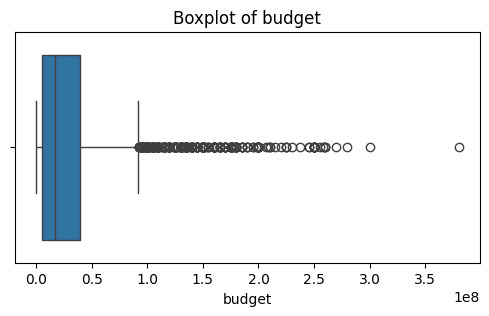

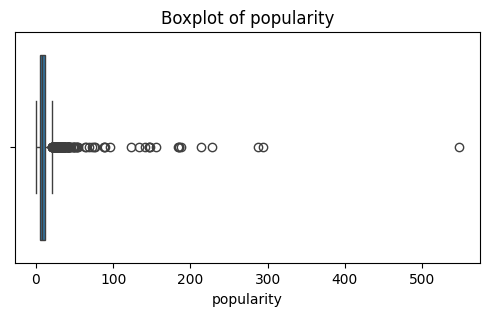

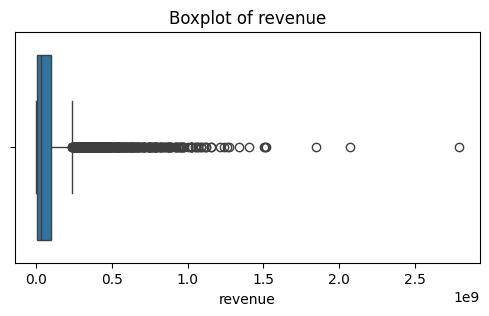

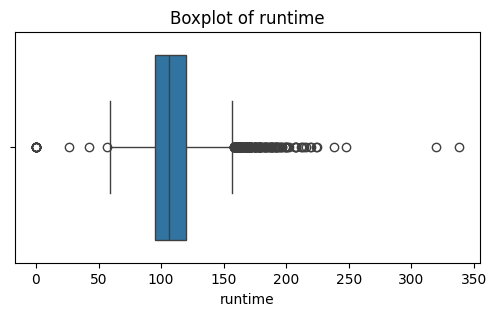

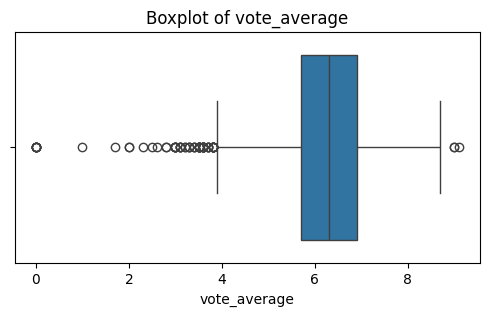

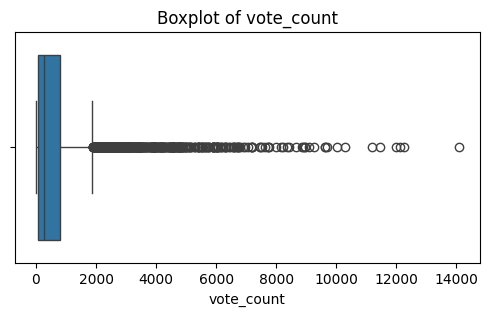

In [50]:
num_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Boxplots to detect outliers
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**- Rmoving Outliers**

In [51]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = df[col].apply(lambda x: upper if x>upper else (lower if x<lower else x))
    return df

In [52]:
for col in num_cols:
    df = cap_outliers(df, col)

# Reset index after removing rows
df.reset_index(drop=True, inplace=True)


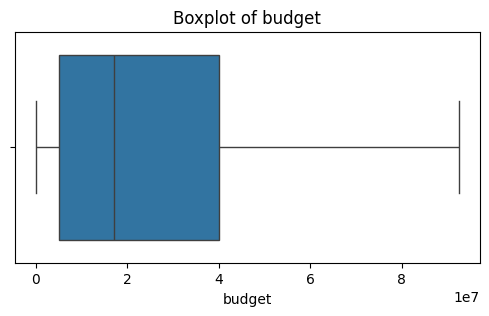

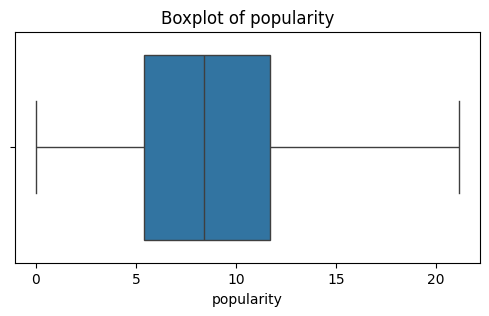

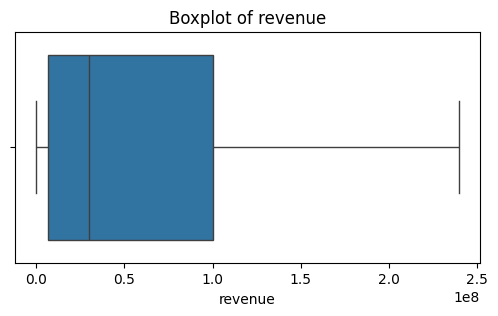

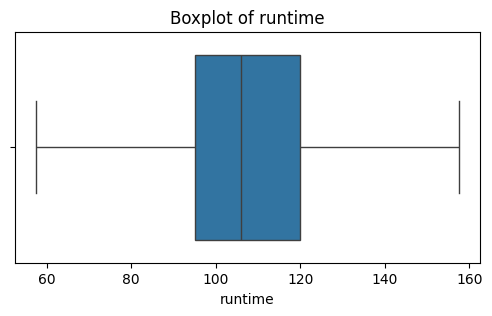

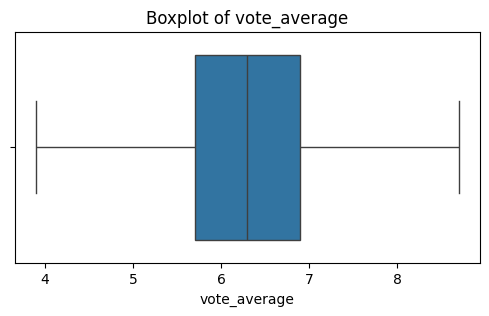

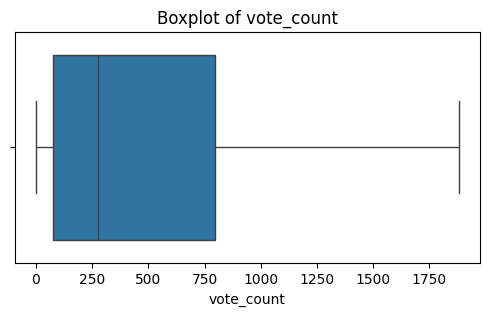

In [53]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [54]:
df['Production_Companies'].str.contains(' ').any()

np.True_

In [55]:
df['Production_Companies'] = df['Production_Companies'].str.strip()

In [56]:
df['Production_Companies'] = df['Production_Companies'].replace('', np.nan)
df = df[df['Production_Companies'].notna()]
df = df[~df['Production_Companies'].str.strip().eq('')]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 0 to 5378
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                5200 non-null   float64       
 1   original_language     5200 non-null   object        
 2   original_title        5200 non-null   object        
 3   popularity            5200 non-null   float64       
 4   release_date          5200 non-null   datetime64[ns]
 5   revenue               5200 non-null   float64       
 6   runtime               5200 non-null   float64       
 7   vote_average          5200 non-null   float64       
 8   vote_count            5200 non-null   float64       
 9   Genres                5200 non-null   object        
 10  Production_Companies  5200 non-null   object        
 11  Production_Countries  5200 non-null   object        
 12  Release_Date          5200 non-null   object        
dtypes: datetime64[ns](1), f

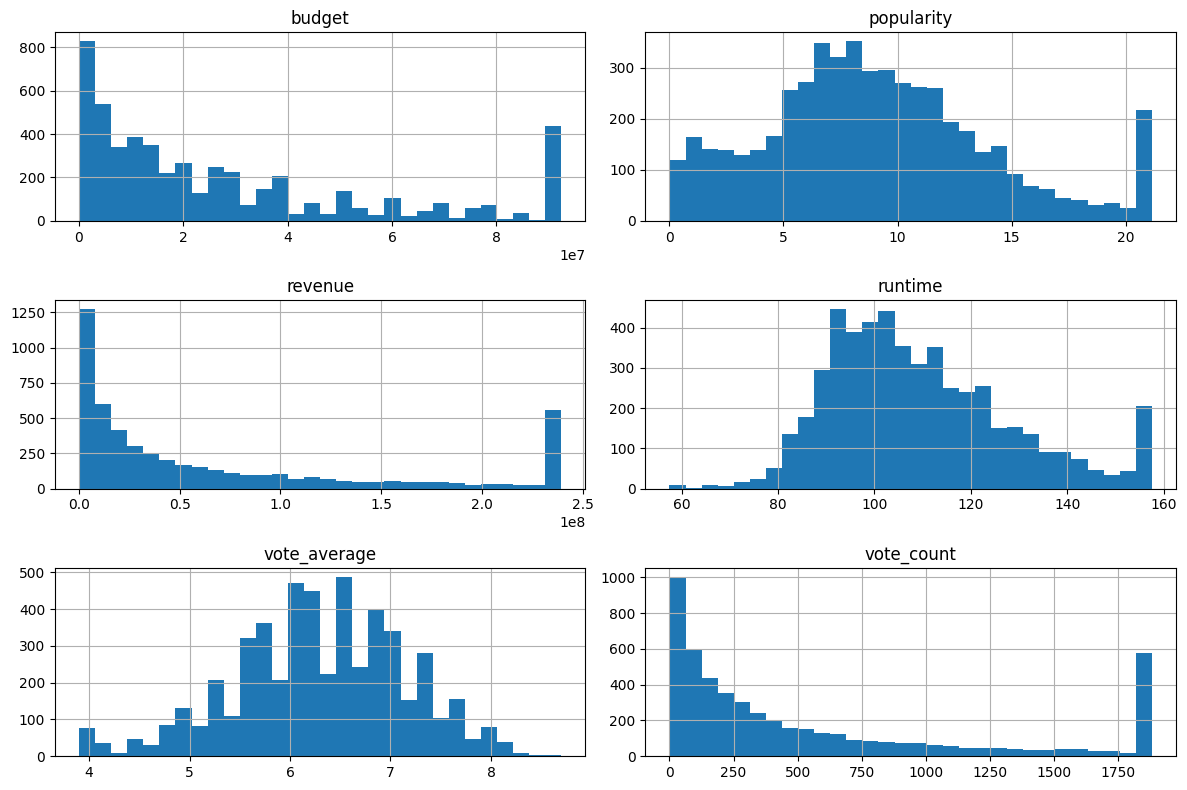

In [58]:
num_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

# Histograms
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

**- Categorical column analysis**


Column: original_language
original_language
en    4669
fr      88
hi      85
ru      56
es      38
ja      37
it      29
zh      27
ko      23
ta      23
Name: count, dtype: int64


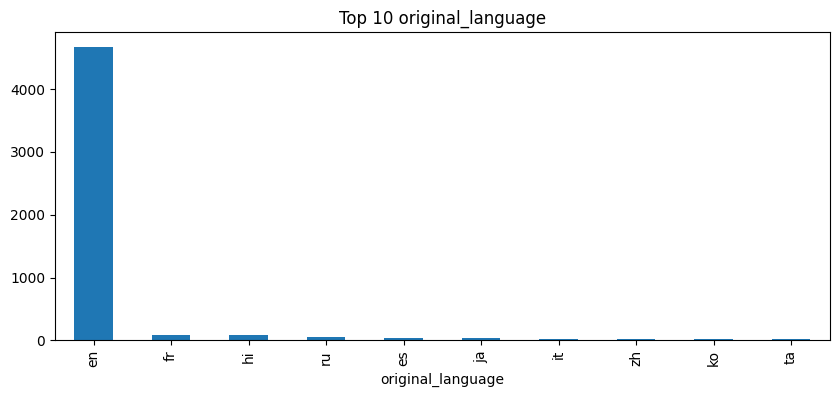


Column: Genres
Genres
Drama                     364
Comedy                    303
Drama, Romance            179
Comedy, Drama             130
Comedy, Romance           128
Comedy, Drama, Romance    110
Horror, Thriller           97
Horror                     68
Drama, Thriller            64
Action, Thriller           53
Name: count, dtype: int64


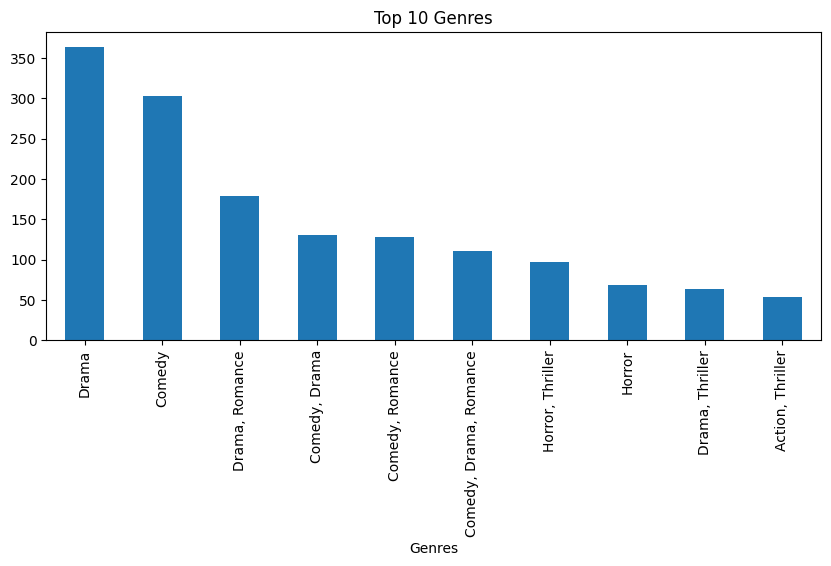


Column: Production_Companies
Production_Companies
Paramount Pictures                        92
Metro-Goldwyn-Mayer (MGM)                 59
Universal Pictures                        59
Warner Bros.                              53
Twentieth Century Fox Film Corporation    45
Columbia Pictures                         40
New Line Cinema                           38
Touchstone Pictures                       24
Walt Disney Pictures                      23
Orion Pictures                            20
Name: count, dtype: int64


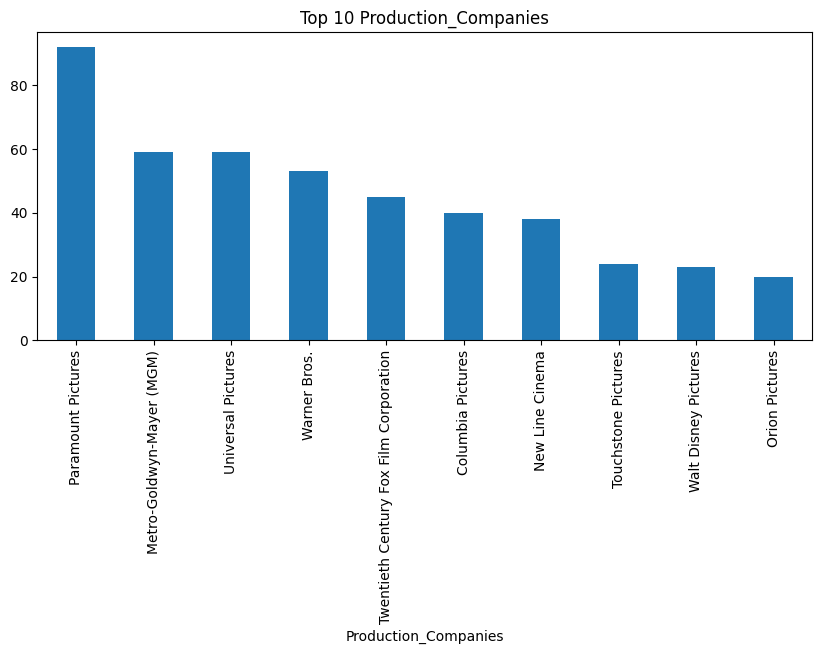


Column: Production_Countries
Production_Countries
United States of America                    3260
United Kingdom, United States of America     208
India                                        129
United Kingdom                               117
Germany, United States of America            110
Canada, United States of America              90
Russia                                        52
France                                        52
France, United States of America              51
Australia, United States of America           42
Name: count, dtype: int64


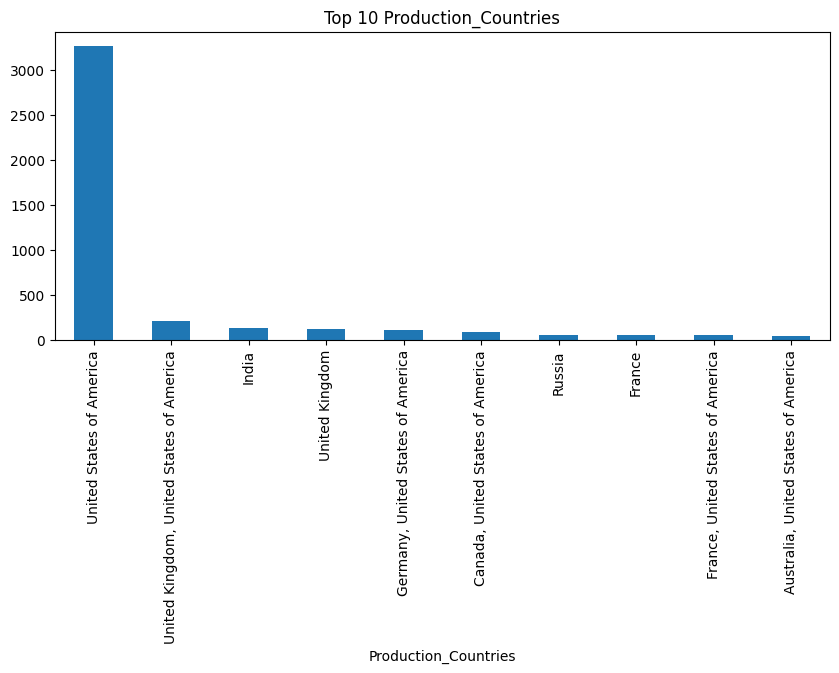


Column: Release_Date
Release_Date
09/2011    38
09/2010    35
09/2012    34
09/2006    34
09/2005    33
09/2009    32
09/2007    31
09/2013    30
11/2016    27
10/2010    25
Name: count, dtype: int64


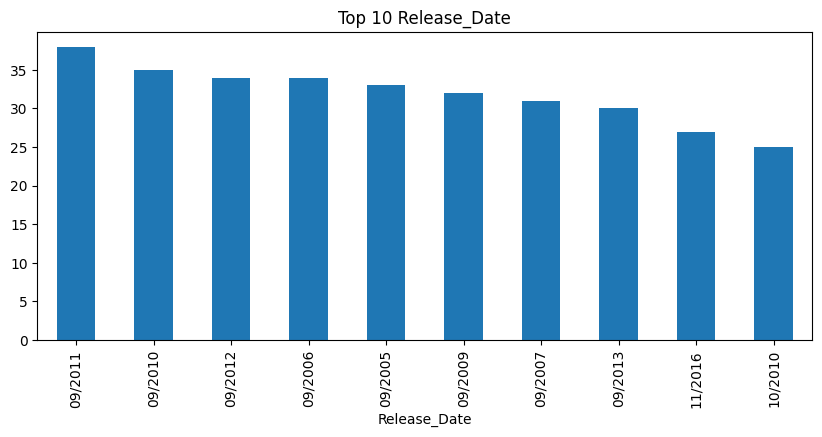

In [59]:
cat_cols = ['original_language', 'Genres',
            'Production_Companies', 'Production_Countries', 'Release_Date']

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # top 10 values
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col}")
    plt.show()

**- Correlation analysis**

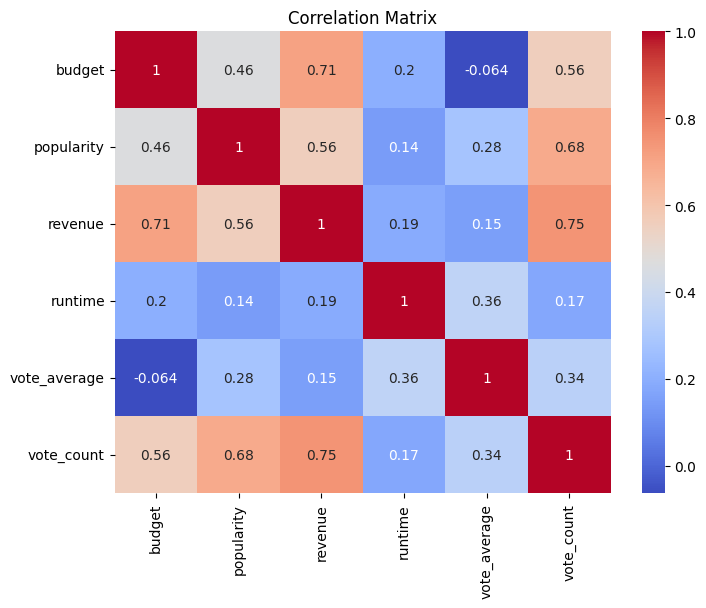

In [60]:
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**- Relationships / scatterplots**

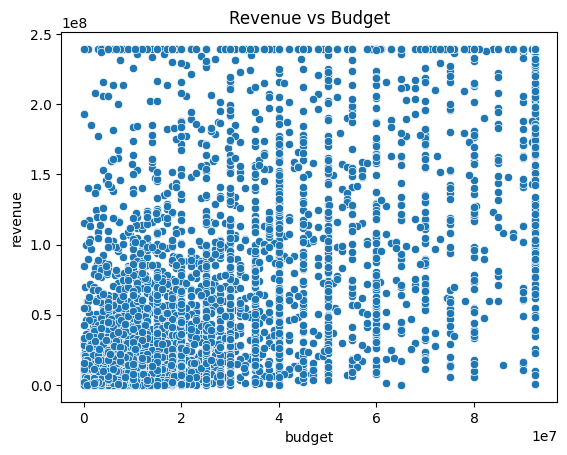

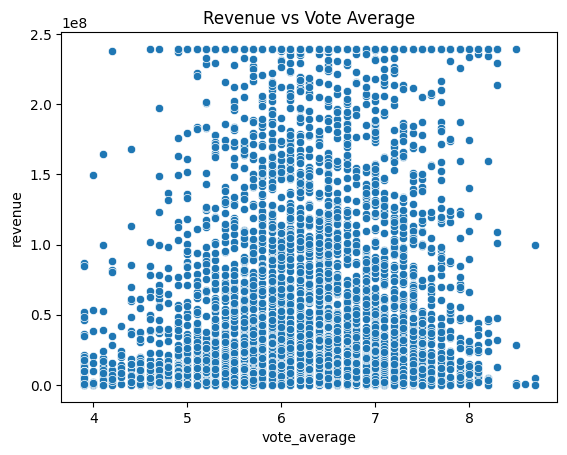

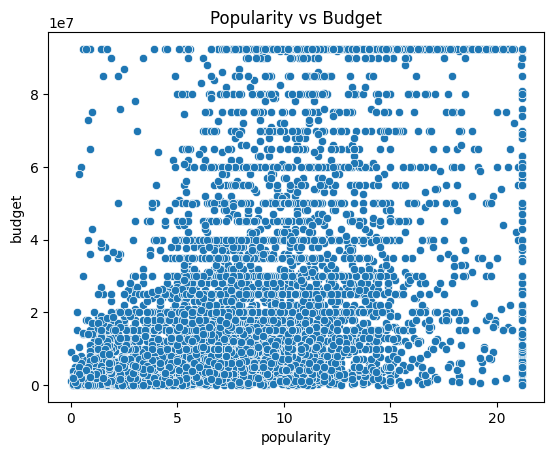

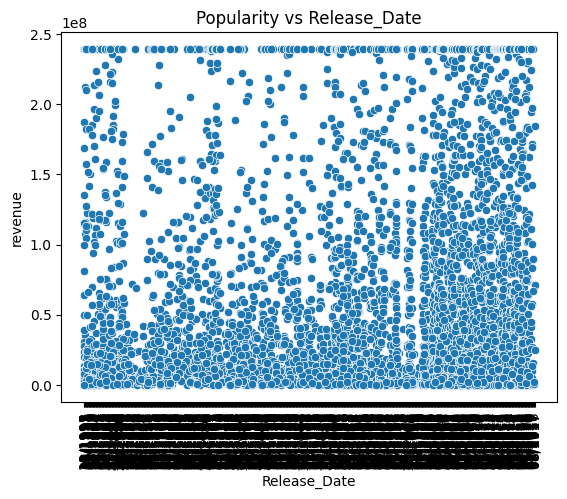

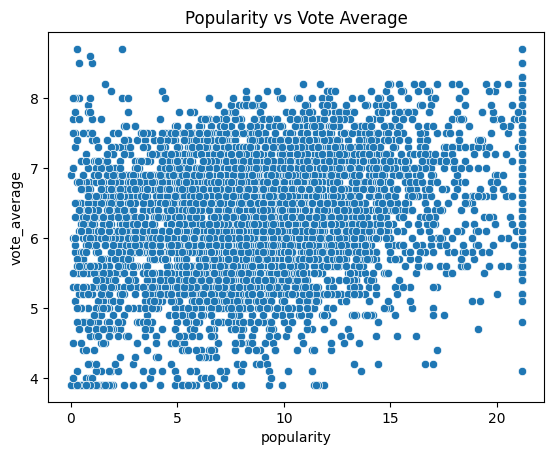

In [61]:
# Revenue vs Budget
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title("Revenue vs Budget")
plt.show()

# Revenue vs Vote Average
sns.scatterplot(x='vote_average', y='revenue', data=df)
plt.title("Revenue vs Vote Average")
plt.show()

# Popularity vs Budget
sns.scatterplot(x='popularity', y='budget', data=df)
plt.title("Popularity vs Budget")
plt.show()

# Revenue vs Release_Year
sns.scatterplot(x='Release_Date', y='revenue', data=df)
plt.title("Popularity vs Release_Date")
plt.xticks(rotation=90)
plt.show()

# Popularity vs Vote Average
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title("Popularity vs Vote Average")
plt.show()

**- Time based Analysis**

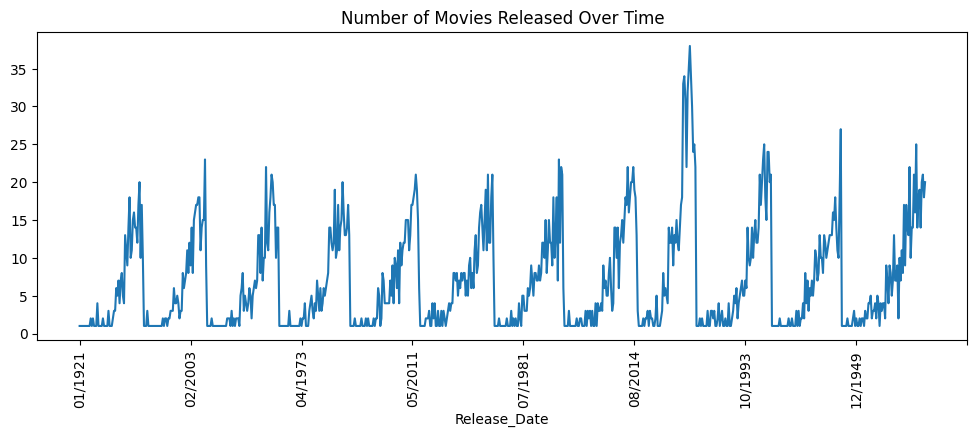

In [62]:
# Movies per release month/year
df['Release_Date'].value_counts().sort_index().plot(kind='line', figsize=(12,4))
plt.title("Number of Movies Released Over Time")
plt.xticks(rotation=90)
plt.show()

In [63]:
df.head()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Genres,Production_Companies,Production_Countries,Release_Date
0,30000000.0,en,Toy Story,21.15,1995-10-30,2.394111e+08,81.0,7.7,1881.375,"Animation, Comedy, Family",Pixar Animation Studios,United States of America,10/1995
1,65000000.0,en,Jumanji,17.00,1995-12-15,2.394111e+08,104.0,6.9,1881.375,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,12/1995
2,16000000.0,en,Waiting to Exhale,3.90,1995-12-22,8.145216e+07,127.0,6.1,34.000,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America,12/1995
3,60000000.0,en,Heat,17.90,1995-12-15,1.874368e+08,157.5,7.7,1881.375,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,12/1995
4,35000000.0,en,Sudden Death,5.20,1995-12-22,6.435017e+07,106.0,5.5,174.000,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Si...",United States of America,12/1995


**- Model Selection and execution**

In [64]:
df.describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
count,5.200000e+03,5200.000000,5200,5.200000e+03,5200.000000,5200.000000,5200.000000
mean,2.805410e+07,9.068712,2000-03-09 19:00:22.153846272,6.817250e+07,109.442788,6.296769,561.105385
min,1.000000e+00,0.000000,1915-02-08 00:00:00,1.000000e+00,57.500000,3.900000,0.000000
25%,6.000000e+06,5.800000,1994-03-27 00:00:00,8.176244e+06,95.000000,5.700000,89.000000
50%,1.800000e+07,8.600000,2004-10-16 00:00:00,3.207873e+07,106.000000,6.300000,293.000000
75%,4.000000e+07,11.800000,2011-04-30 06:00:00,1.028215e+08,120.000000,6.900000,842.250000
max,9.245838e+07,21.150000,2017-08-04 00:00:00,2.394111e+08,157.500000,8.700000,1881.375000
std,2.812204e+07,4.927262,NaN,7.882554e+07,19.004197,0.867776,614.901573


**Regression Model - Revenue Prediction**

In [65]:
y = np.log1p(df['revenue'])

In [66]:
# 🎬 Movie ML Project: Revenue Prediction + Hit/Flop Classification



# -----------------------
# 2. Feature Selection
# -----------------------
features = ['budget', 'original_language', 'popularity', 'runtime',
            'vote_average', 'vote_count',
            'Genres', 'Production_Companies', 'Production_Countries', 'Release_Date']

target_reg = 'revenue'

# -----------------------
# 3. Handle Missing Values
# -----------------------
df = df[features + [target_reg]].dropna()

# -----------------------
# 4. Train-Test Split
# -----------------------
X = df[features]
y = df[target_reg]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -----------------------
# 5. Preprocessing
# -----------------------
num_features = ['budget','popularity','runtime','vote_average','vote_count']
cat_features = ['original_language','Genres',
                'Production_Companies','Production_Countries','Release_Date']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# -----------------------
# 6. Regression Model: Predict Revenue
# -----------------------
reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

print("\n📊 Regression Model (Revenue Prediction)")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Feature Importance
encoder = reg_model.named_steps['preprocessor'].named_transformers_['cat']
cat_encoded = encoder.get_feature_names_out(cat_features)
all_features = np.concatenate([num_features, cat_encoded])

importances = reg_model.named_steps['regressor'].feature_importances_
feat_imp_reg = pd.Series(importances, index=all_features).sort_values(ascending=False)

print("\n🔝 Top 10 Features (Regression):")
print(feat_imp_reg.head(10))

# -----------------------
# 7. Classification Model: Hit/Flop
# -----------------------
df['success'] = (df['revenue'] > df['budget']).astype(int)

X_class = df[features]
y_class = df['success']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

clf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

clf_model.fit(X_train_c, y_train_c)
y_pred_c = clf_model.predict(X_test_c)

print("\n📊 Classification Model (Hit/Flop Prediction)")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

# Feature Importance
encoder_c = clf_model.named_steps['preprocessor'].named_transformers_['cat']
cat_encoded_c = encoder_c.get_feature_names_out(cat_features)
all_features_c = np.concatenate([num_features, cat_encoded_c])

importances_c = clf_model.named_steps['classifier'].feature_importances_
feat_imp_clf = pd.Series(importances_c, index=all_features_c).sort_values(ascending=False)

print("\n🔝 Top 10 Features (Classification):")
print(feat_imp_clf.head(10))



📊 Regression Model (Revenue Prediction)
Mean Squared Error (MSE): 1681104170007178.5
R² Score: 0.7138120624840856

🔝 Top 10 Features (Regression):
vote_count                                       0.553049
budget                                           0.194449
runtime                                          0.025789
popularity                                       0.024015
vote_average                                     0.020271
Production_Countries_United States of America    0.004093
Genres_Comedy, Romance                           0.003605
Genres_Adventure, Action, Thriller               0.002863
Production_Countries_China                       0.001860
Genres_Drama                                     0.001782
dtype: float64

📊 Classification Model (Hit/Flop Prediction)
Accuracy: 0.7461538461538462

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.26      0.39       317
           1       0.75      0.96      0.84     

**Regression (Revenue Prediction)**

MSE: 1.6859e+15 — that’s huge, but revenue values themselves are often in the millions/billions, so large errors are expected.

R² Score: 0.713 → This is good: about 71% of variance in revenue is explained by your model.

🔝 Top Features:

vote_count (0.55) → Strongest predictor. More votes = more revenue.

budget (0.19) → Higher budgets generally mean higher revenue (but not always ROI).

popularity, runtime, vote_average also matter.

Country and genre dummies (USA, China, Comedy/Romance, Adventure/Action/Thriller, Drama) have small but non-zero influence.

👉 Interpretation: Your model relies mostly on audience engagement (vote_count, popularity) and budget. Content features like genres and production country are secondary.

🎬 Classification (Hit/Flop Prediction)

Accuracy: 0.745 (~75%) → solid for a baseline model.

Recall for Class 1 (Hit) = 0.96 → Your model is excellent at catching "Hits".

Recall for Class 0 (Flop) = 0.26 → Weak at identifying "Flops" (many false positives).

🔝 Top Features:

vote_count, popularity, budget, vote_average, runtime dominate.

Production country (USA, Canada), language (English), and genres (Drama, Comedy) have minor influence.

👉 Interpretation: The model is biased towards predicting “Hit”, which is common if the dataset has more successful movies than flops.

**- Graph Representation**

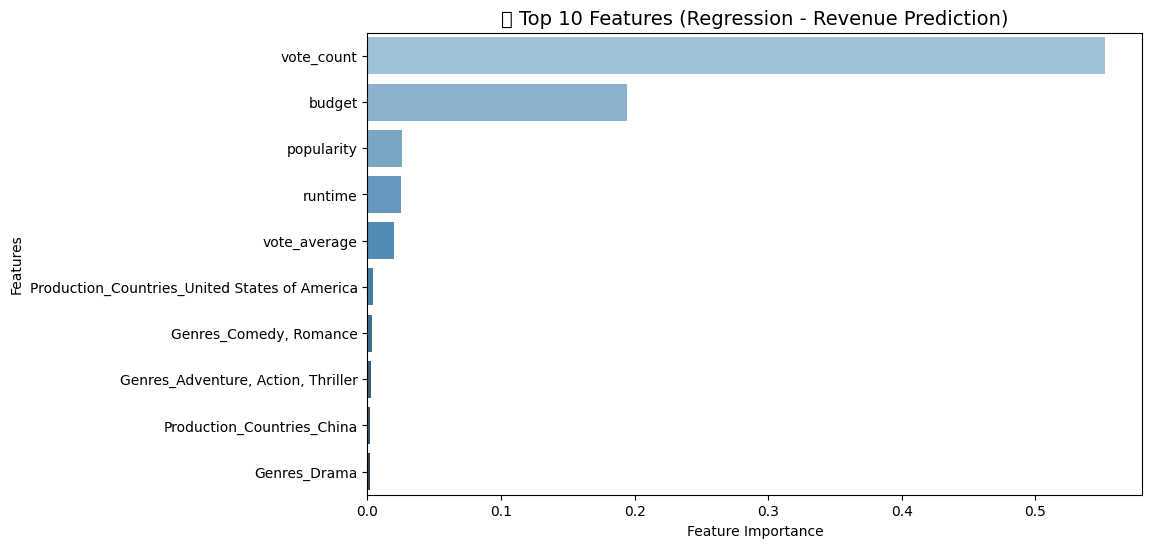

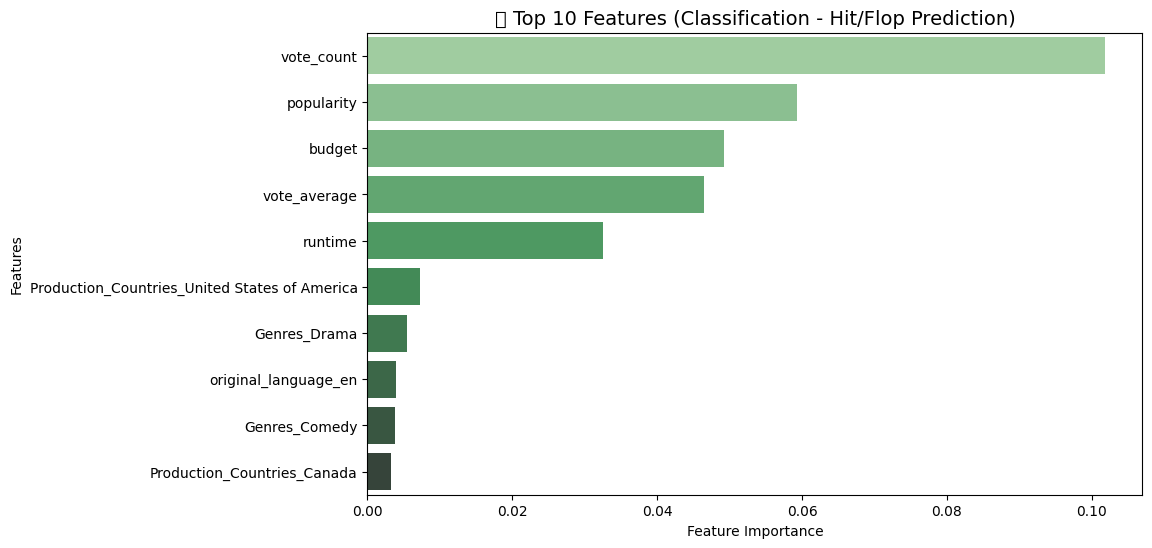

In [ ]:
# --- Regression Feature Importance ---
reg_importances = {
    'vote_count': 0.552523,
    'budget': 0.194309,
    'popularity': 0.025943,
    'runtime': 0.025302,
    'vote_average': 0.020140,
    'Production_Countries_United States of America': 0.003982,
    'Genres_Comedy, Romance': 0.003527,
    'Genres_Adventure, Action, Thriller': 0.002833,
    'Production_Countries_China': 0.001885,
    'Genres_Drama': 0.001820
}

reg_series = pd.Series(reg_importances).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=reg_series.values, y=reg_series.index, palette="Blues_d")
plt.title("🔝 Top 10 Features (Regression - Revenue Prediction)", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


# --- Classification Feature Importance ---
clf_importances = {
    'vote_count': 0.101892,
    'popularity': 0.059245,
    'budget': 0.049165,
    'vote_average': 0.046530,
    'runtime': 0.032510,
    'Production_Countries_United States of America': 0.007283,
    'Genres_Drama': 0.005404,
    'original_language_en': 0.003968,
    'Genres_Comedy': 0.003876,
    'Production_Countries_Canada': 0.003318
}

clf_series = pd.Series(clf_importances).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=clf_series.values, y=clf_series.index, palette="Greens_d")
plt.title("🔝 Top 10 Features (Classification - Hit/Flop Prediction)", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5200 entries, 0 to 5378
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5200 non-null   float64
 1   original_language     5200 non-null   object 
 2   popularity            5200 non-null   float64
 3   runtime               5200 non-null   float64
 4   vote_average          5200 non-null   float64
 5   vote_count            5200 non-null   float64
 6   Genres                5200 non-null   object 
 7   Production_Companies  5200 non-null   object 
 8   Production_Countries  5200 non-null   object 
 9   Release_Date          5200 non-null   object 
 10  revenue               5200 non-null   float64
 11  success               5200 non-null   int64  
 12  ROI                   5200 non-null   float64
 13  log_budget            5200 non-null   float64
 14  log_revenue           5200 non-null   float64
 15  hit                   5200

**- New Model for better Accuracy**

In [70]:
df.head()

,budget,original_language,popularity,runtime,vote_average,vote_count,Genres,Production_Companies,Production_Countries,Release_Date,revenue,success,ROI,log_budget,log_revenue,hit
0,30000000.0,en,21.15,81.0,7.7,1881.375,"Animation, Comedy, Family",Pixar Animation Studios,United States of America,10/1995,2.394111e+08,1,7.980369,17.216708,19.293693,1
1,65000000.0,en,17.00,104.0,6.9,1881.375,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,12/1995,2.394111e+08,1,3.683247,17.989898,19.293693,1
2,16000000.0,en,3.90,127.0,6.1,34.000,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,United States of America,12/1995,8.145216e+07,1,5.090759,16.588099,18.215526,1
3,60000000.0,en,17.90,157.5,7.7,1881.375,"Action, Crime, Drama, Thriller","Regency Enterprises, Forward Pass, Warner Bros.",United States of America,12/1995,1.874368e+08,1,3.123947,17.909855,19.048952,1
4,35000000.0,en,5.20,106.0,5.5,174.000,"Action, Adventure, Thriller","Universal Pictures, Imperial Entertainment, Si...",United States of America,12/1995,6.435017e+07,1,1.838576,17.370859,17.979850,1


**- Feature Engineering**

In [78]:
def feature_engineering(df):
    df = df.fillna(0)

    # Release date features
    if "Release_Date" in df.columns:
        df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")
        df["release_month"] = df["Release_Date"].dt.month.fillna(0).astype(int)
        df["release_year"] = df["Release_Date"].dt.year.fillna(0).astype(int)
        df["release_season"] = df["Release_Date"].dt.month % 12 // 3 + 1

    # ROI
    df["ROI"] = df["revenue"] / (df["budget"] + 1)

    # Log transforms
    df["log_budget"] = np.log1p(df["budget"])
    df["log_revenue"] = np.log1p(df["revenue"])

    # Hit/Flop classification (threshold ROI > 1.5)
    df["hit"] = (df["ROI"] > 1.5).astype(int)

    # Encode categorical features
    cat_cols = ["original_language", "Genres", "Production_Companies", "Production_Countries"]
    for col in cat_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

    return df

df = feature_engineering(df)

**- Define Features**

In [79]:
features = ["log_budget", "vote_count", "popularity", "runtime", "vote_average",
            "original_language", "Genres", "Production_Companies", "Production_Countries",
            "release_month", "release_year", "release_season"]

**- Regression Model**

In [80]:
X_reg = df[features]
y_reg = df["log_revenue"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

print("\n📊 Regression Model (Revenue Prediction)")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1680
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 12
[LightGBM] [Info] Start training from score 16.816497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

**- Classification Model**

In [81]:
X_clf = df[features]
y_clf = df["hit"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

In [82]:
# Balance classes using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_clf, y_train_clf)

clf_model = lgb.LGBMClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    class_weight="balanced",
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

clf_model.fit(X_train_res, y_train_res)
y_pred_clf = clf_model.predict(X_test_clf)

print("\n📊 Classification Model (Hit/Flop Prediction)")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

[LightGBM] [Info] Number of positive: 2540, number of negative: 2540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 5080, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

**- Feature Importance**

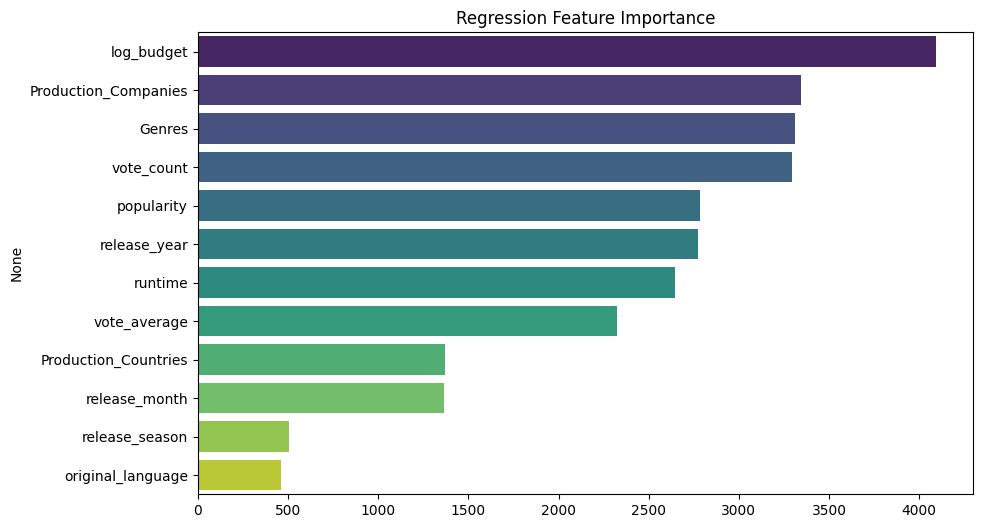

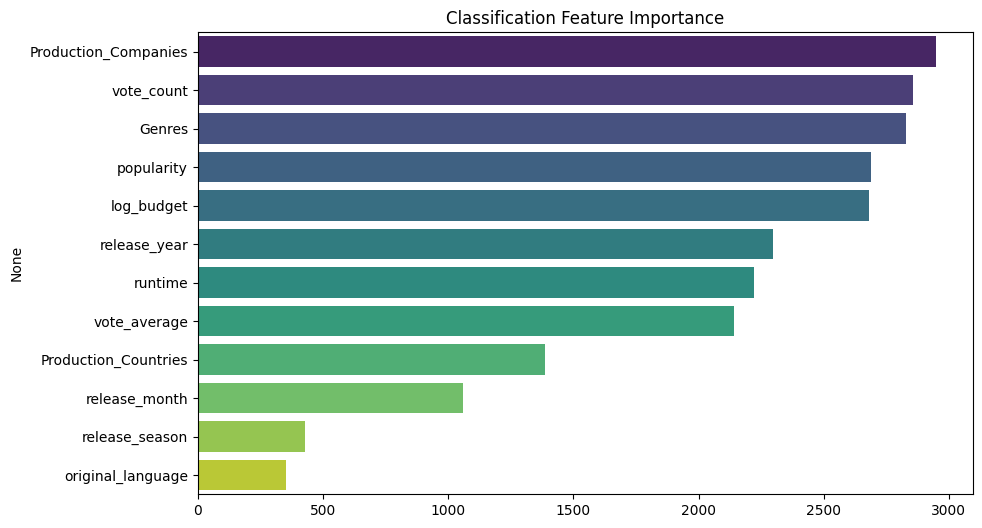

In [83]:
def plot_feature_importance(model, features, title="Feature Importance"):
    importance = model.feature_importances_
    feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
    plt.title(title)
    plt.show()

plot_feature_importance(reg_model, features, "Regression Feature Importance")
plot_feature_importance(clf_model, features, "Classification Feature Importance")